In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Data Collection, Understanding & Cleaning : ensure the dataset is of good quality.
- <b>Data Collection:</b> Obtain the dataset you want to work with. This could be from various sources like databases, APIs, or CSV files. <b>(day.csv)</b>
- <b>Data Understanding:</b> Explore and understand the dataset thoroughly. This involves examining the features, their data types, distributions, summary statistics, and relationships between variables. Visualization techniques such as histograms, scatter plots, and correlation matrices can be helpful in gaining insights into the data.
- <b>Data Cleaning:</b> Handle missing values, duplicate records, and outliers in the dataset. This ensures that the data is of good quality for modeling.

# Steps:
- <b>Understand the Problem:</b> Gain a clear understanding of the problem you're trying to solve and the type of data available. Understand which features are likely to be important based on domain knowledge or problem context.

- <b>Explore the Data:</b> Explore the dataset to understand the characteristics of each feature. Visualize the data using histograms, scatter plots, correlation matrices, etc. Identify features that are highly correlated with the target variable or with each other.

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Fix Outliers were removed from the dataset 
# by excluding data points below Q25-1.5IQR and above Q75+1.5IQR, 
# enabling focused analysis on the core dataset.

def fix_numeric_IQR_range(num_range_cleanup_col,df):
    #WIP - Work In Progress
    #print('Shape of data frame :',df.shape)    
    dftype_dict = df.dtypes.to_dict()
    for col,typ in dftype_dict.items():
        #print(col, typ)
        if (col in num_range_cleanup_col and typ in ('int64','float64')):
            q5,q25,q50,q75,q95 = df[col].quantile([0.05,.25,.5,.75,.95])
            #calculates the range of data to have in the dataframe
            high = q75+1.5*(q75-q25)
            low = q25-1.5*(q75-q25)
            #print("To fix 1.5XIQR,  {} has min of {} , max of {} and valid data range of Low:{} and high:{}".format(col, df[col].min() ,df[col].max(),low,high))
            #print('for {} the low:{} , Q5:{} , Q25:{} , Q50:{}, Q75:{} , Q95:{} and high:{}'.format(col,low,q5,q25,q50,q75,q95,high))
            if df[col].max() > high:
                print(col,':before-high-fix:',df.shape)
                df = df[df[col]<high]
                print(col,':after-high-fix:',df.shape)
            if df[col].min() < low:
                print(col,'before-low-fix:',df.shape)
                df = df[df[col]>low]
                print(col,'after-low-fix:',df.shape)
            #print('Shape of data frame after 1,5 IQR fix:',df.shape)
    return df

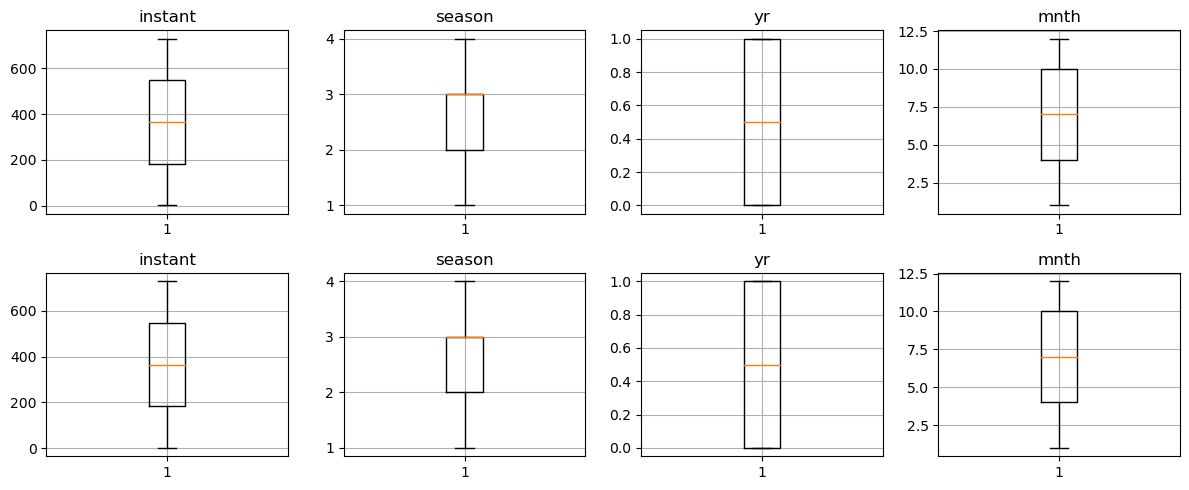

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
#'instant','season','yr','mnth'
col_array = ['instant','season','yr','mnth']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [8]:
df.shape

(730, 16)

casual :before-high-fix: (730, 16)
casual :after-high-fix: (686, 16)


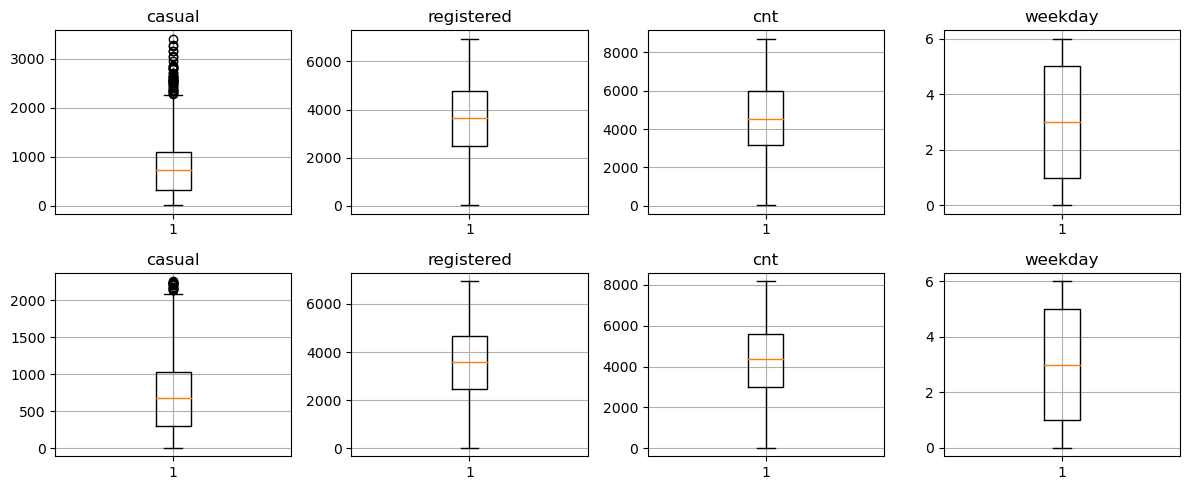

In [9]:
#casual	registered	cnt, weekday
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
col_array = ['casual','registered','cnt', 'weekday']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [10]:
df.shape

(686, 16)

hum before-low-fix: (686, 16)
hum after-low-fix: (684, 16)
windspeed :before-high-fix: (684, 16)
windspeed :after-high-fix: (672, 16)


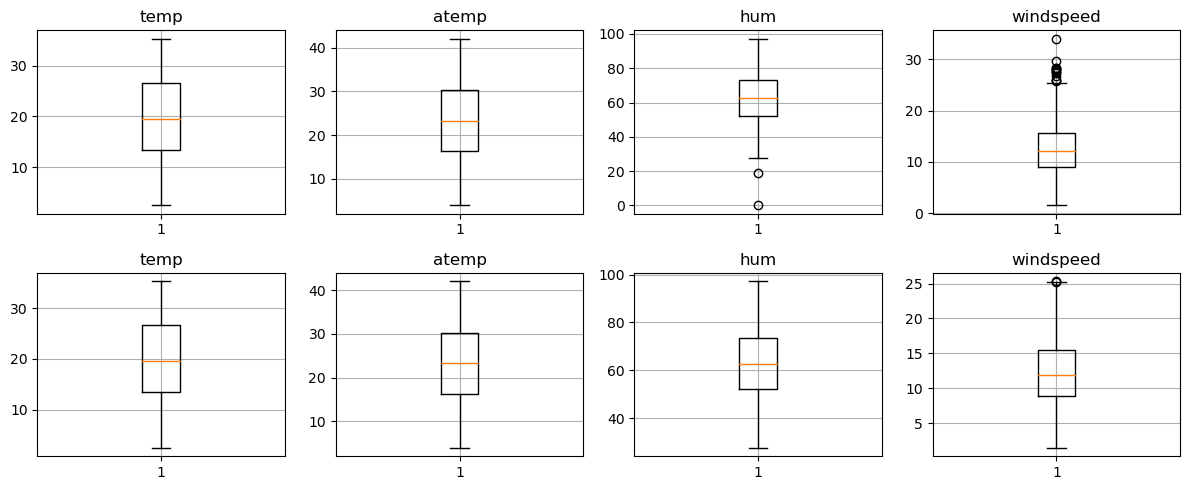

In [11]:
#temp	atemp	hum	windspeed
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
col_array = ['temp','atemp','hum','windspeed']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,357.498512,2.505952,0.474702,6.563988,0.026786,2.962798,0.727679,1.403274,20.075073,23.464246,63.259044,12.507080,739.937500,3631.555060,4371.492560
std,211.834201,1.122840,0.499732,3.503298,0.161577,1.928711,0.445486,0.548284,7.591501,8.233313,14.041429,4.856768,522.760826,1578.222253,1862.065763
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,27.583300,1.500244,2.000000,20.000000,22.000000
25%,174.750000,1.000000,0.000000,3.750000,0.000000,1.000000,0.000000,1.000000,13.470222,16.311087,52.458300,8.989859,304.750000,2483.500000,3070.250000
50%,348.500000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.850847,23.594900,63.083300,11.916922,681.000000,3615.500000,4401.000000
75%,544.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.795202,30.397950,73.427100,15.463466,1031.250000,4712.000000,5633.250000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,25.333236,2258.000000,6946.000000,8173.000000


In [13]:
df.shape

(672, 16)

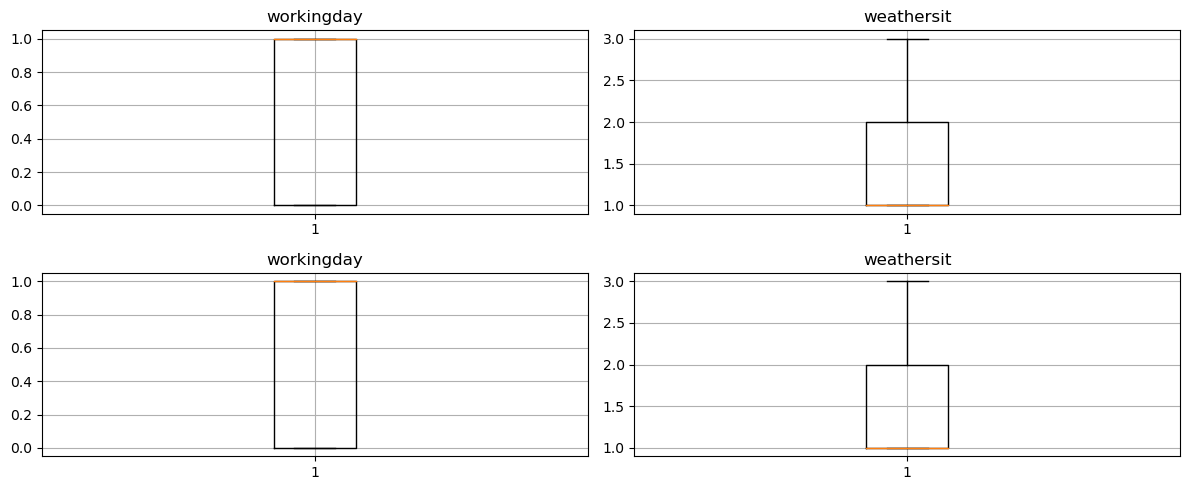

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
#holiday	weekday	workingday	weathersit
col_array = ['workingday','weathersit']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [15]:
df.shape

(672, 16)

## Reloading data into dataframe after analysis  

In [16]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### a. Data Transformation

In [17]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
print(df.season.unique())
df.season = df.season.apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter' )
print(df.season.unique())

[1 2 3 4]
['spring' 'summer' 'fall' 'winter']


In [18]:
#yr: year (0: 2018, 1:2019)
print(df.yr.unique())
df.yr = df.yr.apply(lambda x: 2018 if x==0 else 2019 if x==1 else 1900 )
print(df.yr.unique())

[0 1]
[2018 2019]


## Plotting correlations on numaric independent variables.

In [19]:
num_df = pd.DataFrame()
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if (typ in ('int64','float64')):
        num_df[col] = df[col]

In [20]:
num_df.corr()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000e+00,7.923268e-13,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,7.923268e-13,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


<Axes: xlabel='windspeed', ylabel='cnt'>

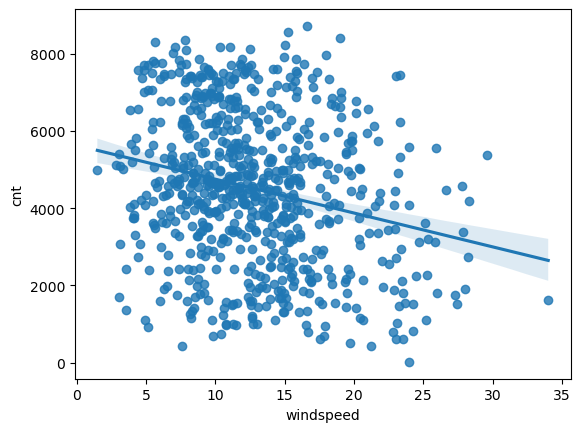

In [21]:
sns.regplot(x='windspeed',y='cnt', data=df)

<Axes: xlabel='temp', ylabel='cnt'>

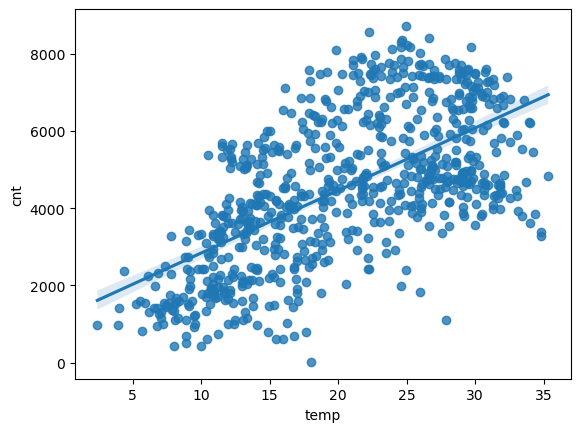

In [22]:
sns.regplot(x='temp',y='cnt', data=df)

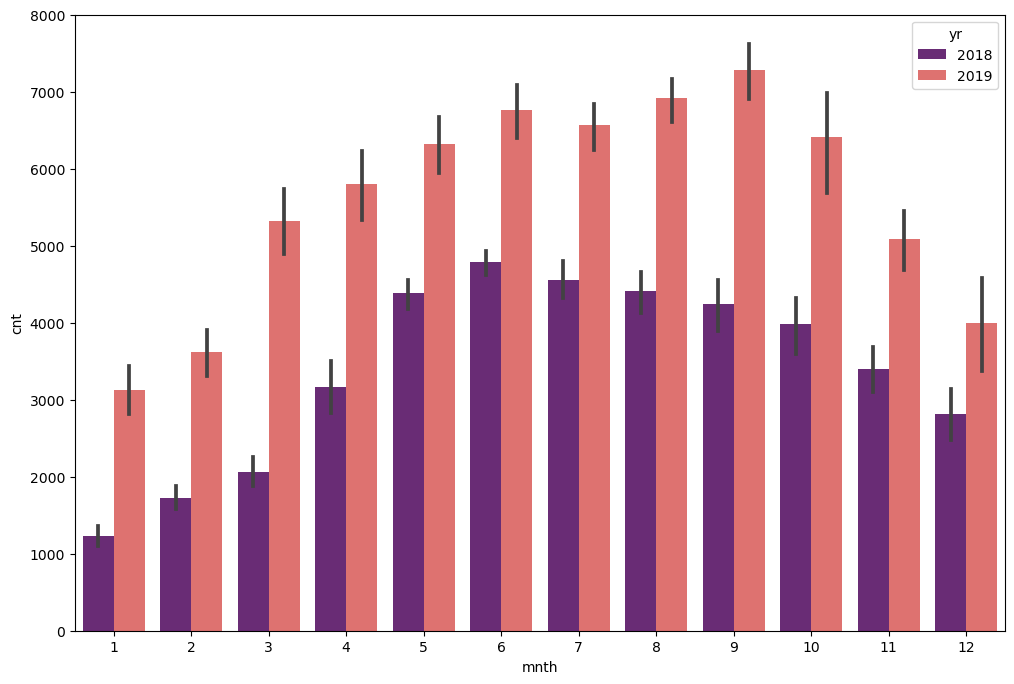

In [23]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='mnth', y='cnt', hue='yr', data=df, palette='magma')


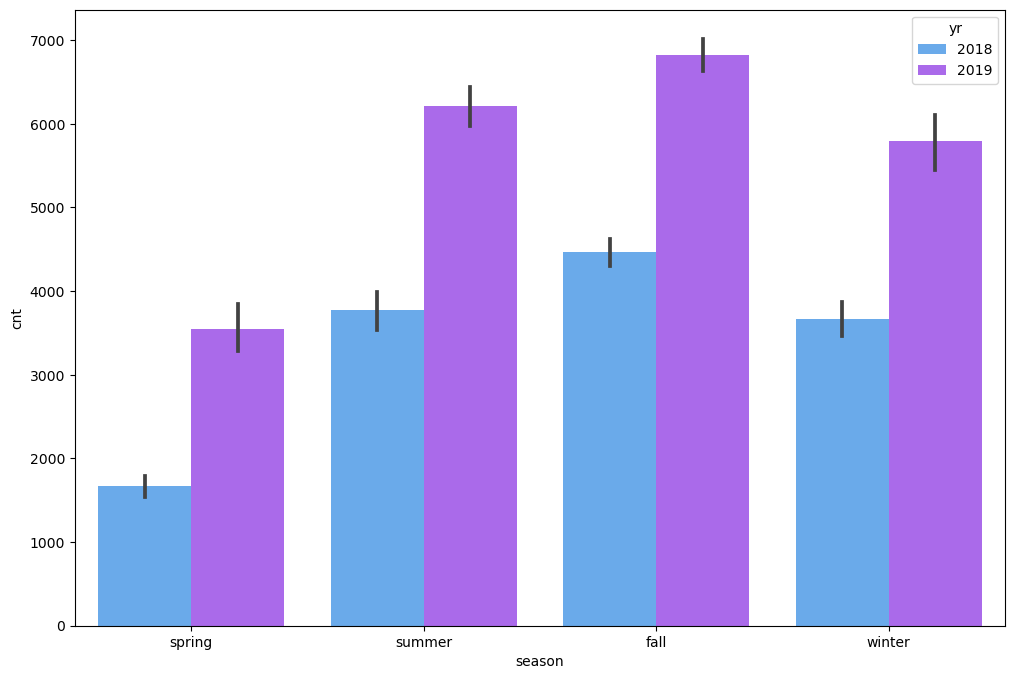

In [24]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='season', y='cnt', hue='yr',data=df, palette='cool')


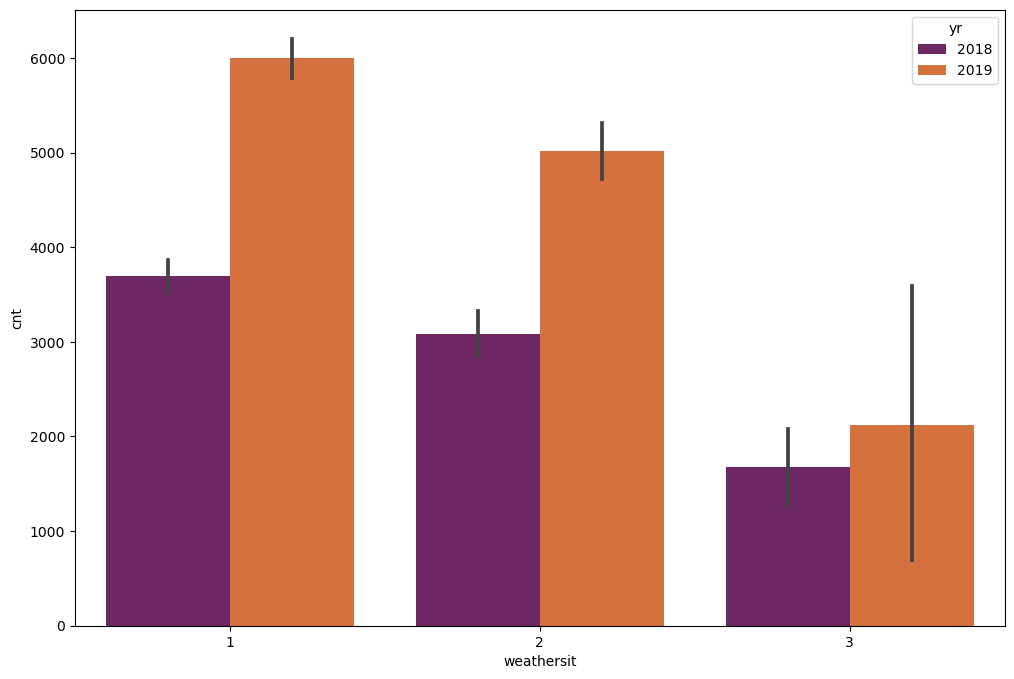

In [25]:
#weathersit
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='weathersit', y='cnt', hue='yr',data=df, palette='inferno')

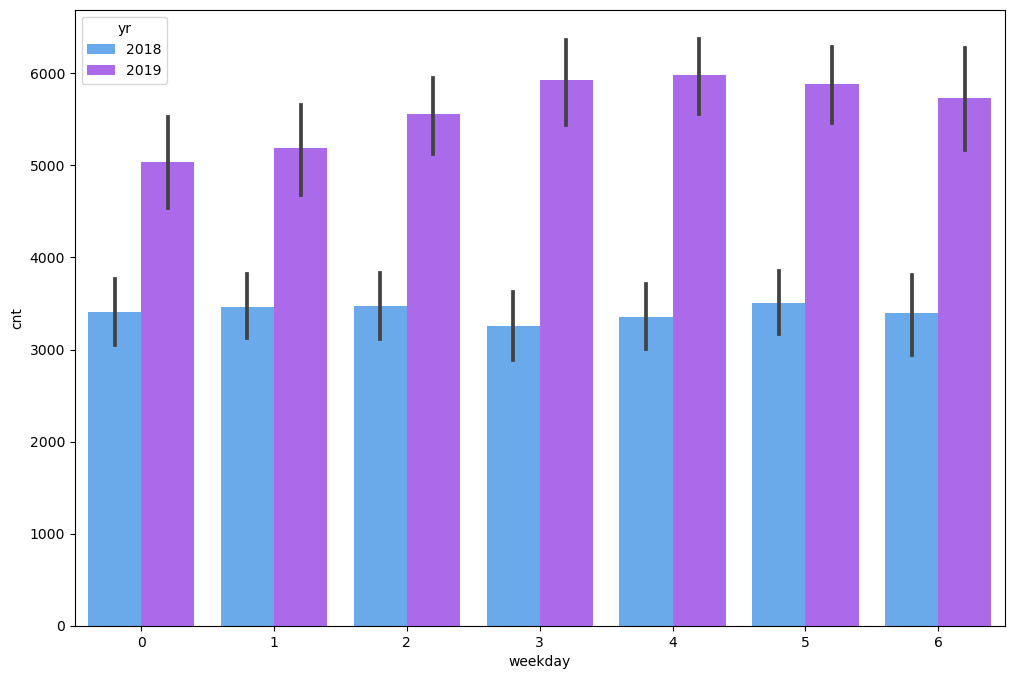

In [26]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='weekday', y='cnt', hue='yr',data=df, palette='cool')


<Axes: xlabel='weekday', ylabel='cnt'>

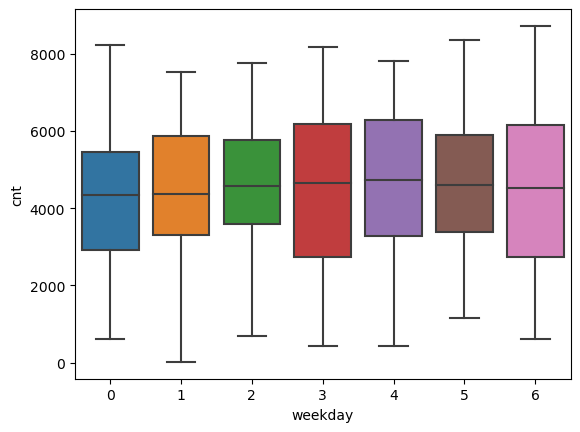

In [27]:
sns.boxplot(x = 'weekday', y = 'cnt', data = df)


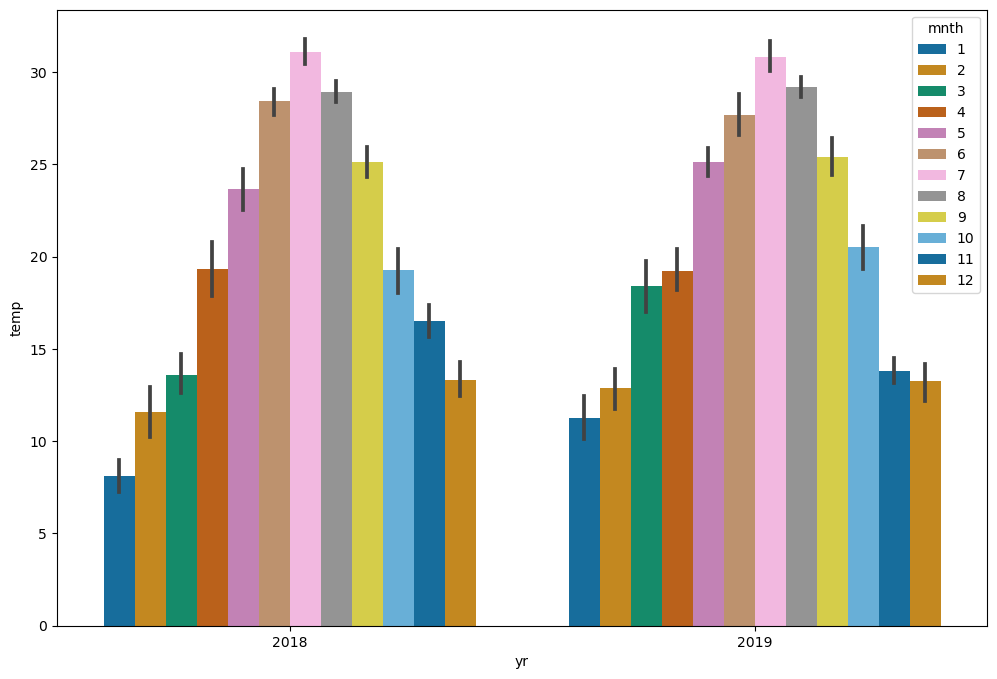

In [28]:

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='yr', y='temp', hue='mnth',data=df, palette='colorblind')

<Axes: >

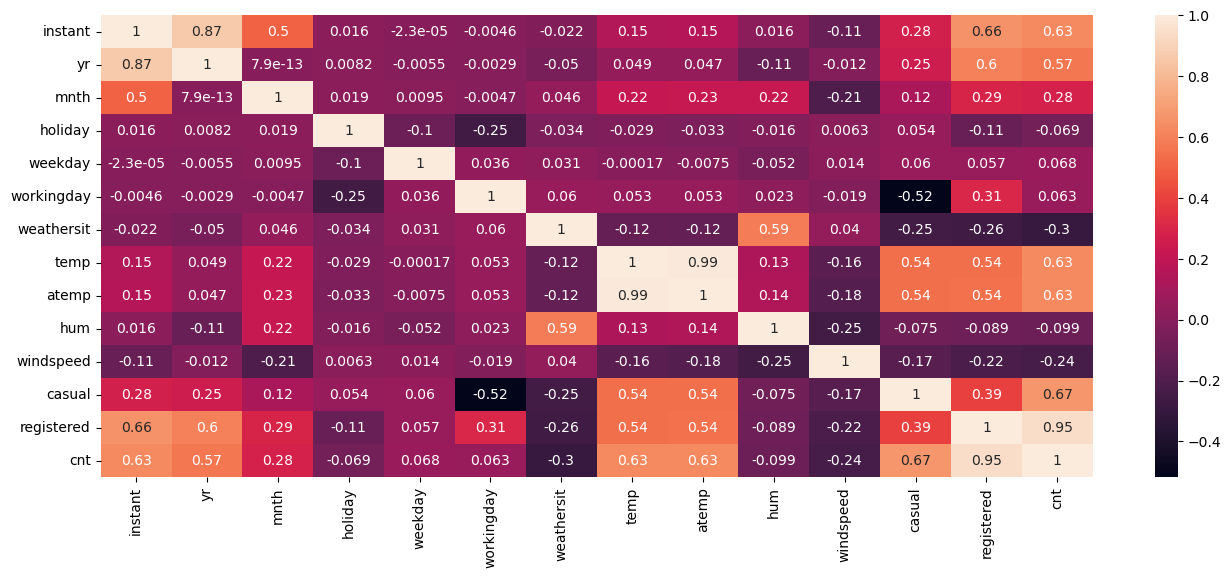

In [29]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(num_df.corr(), annot=True)  


#### lets drop columns that are not useful for the analysis/model
- instant 
- temp or atemp
- casual
- registered


/Users/narayanaisanaka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


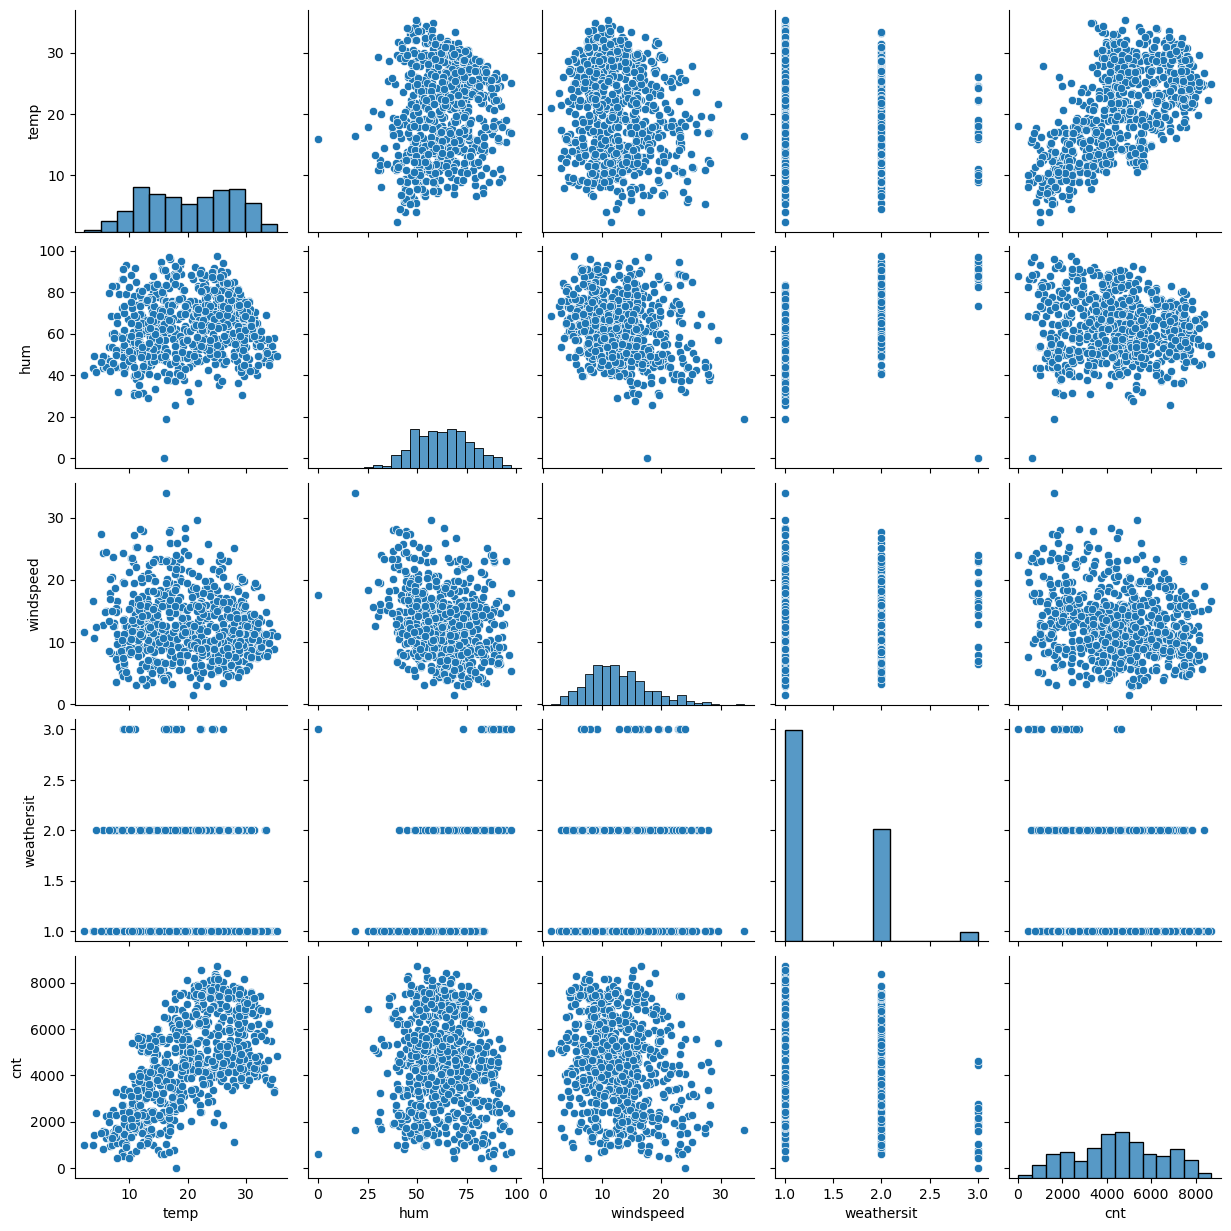

In [30]:
visual = df[['temp', 'hum','windspeed','weathersit','cnt']]
sns.pairplot(visual)
plt.show()

<Axes: >

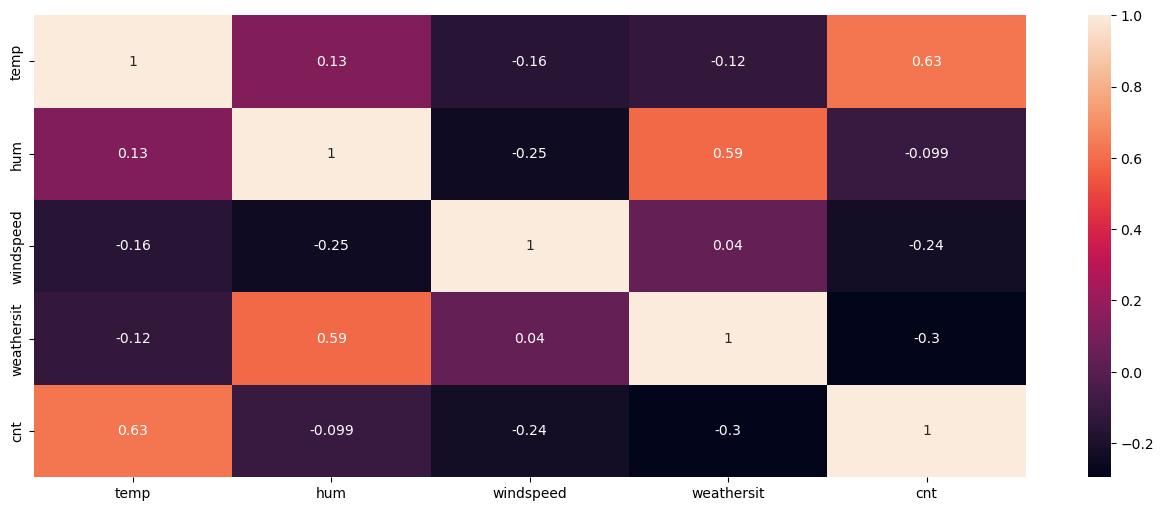

In [31]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(visual.corr(), annot=True)  

## 2. Feature Selection helps in reducing the dimensionality of the dataset and focuses on the most relevant features.


# Steps : 
<b>Feature Ranking:</b> Use statistical methods or machine learning algorithms to rank the features based on their importance. Common methods include:

<b>Correlation Analysis:</b> Calculate the correlation coefficient between each feature and the target variable. Features with higher absolute correlation coefficients are considered more important.

<b>Feature Importance:</b> Train a machine learning model (e.g., decision trees, random forests) and examine the feature importance scores provided by the model. Features with higher importance scores are considered more relevant.

<b>Information Gain:</b> Use information gain or mutual information measures to assess the dependency between each feature and the target variable.

<b>Select Features:</b> Based on the rankings obtained in the previous step, select the top 'k' features that are most relevant to the target variable. You can also use domain knowledge or business requirements to guide feature selection.

<b>Validate Feature Subset:</b> Validate the selected feature subset using cross-validation or other evaluation techniques. Ensure that the performance of the model using the selected features is comparable or better than using the entire feature set.

<b>Iterative Process:</b> Feature selection is often an iterative process. You may need to try different feature subsets and evaluate their performance until you find the optimal set of features.

<b>Monitor Model Performance:</b> Monitor the performance of the model with the selected features over time. If new features become available or if the importance of existing features changes, reevaluate the feature selection process.

In [32]:
df = pd.read_csv('day.csv')
#instant,temp or atemp,casual, registered , dteday
df.drop(['instant','atemp','casual','registered','dteday'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [33]:
#map weathersit
def weather_map(x):
  return x.map({1: 'Clear_Few_clouds_Partly_cloudy',
                2: 'Mist_Cloudy_Broken_clouds_Few_clouds',
                3: 'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
                4: 'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist_Snow_Fog'})

df[['weathersit']] = df[['weathersit']].apply(weather_map)
df.head()
weathersit = pd.get_dummies(df['weathersit'], drop_first=True).astype(int)
df.drop(['weathersit'], axis=1, inplace=True)
df = pd.concat([df, weathersit], axis=1)
weathersit.head()

,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [34]:
#map weekday
def weekday_map(x):
  return x.map({0: 'sun', 1: 'mon',2: 'tue', 3: 'wed',4: 'thu', 5: 'fri', 6: 'sat'})

df[['weekday']] = df[['weekday']].apply(weekday_map)

weekdays = pd.get_dummies(df['weekday'], drop_first=True).astype(int)

df.drop(['weekday'], axis=1, inplace=True)
df = pd.concat([df, weekdays], axis=1)
weekdays.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [35]:
#map year
def year_map(x):
  return x.map({0: '2018', 1: '2019'})

df[['yr']] = df[['yr']].apply(year_map)

years = pd.get_dummies(df['yr'], drop_first=True).astype(int)

df.drop(['yr'], axis=1, inplace=True)
df = pd.concat([df, years], axis=1)
years.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [36]:
#map months
def month_map(x):
  return x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

df[['mnth']] = df[['mnth']].apply(month_map)

mnths = pd.get_dummies(df['mnth'], drop_first=True).astype(int)

df.drop(['mnth'], axis=1, inplace=True)
df = pd.concat([df, mnths], axis=1)
mnths.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
def summer_map(x):
  return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

df[['season']] = df[['season']].apply(summer_map)
seasons = pd.get_dummies(df['season'], drop_first=True).astype(int)
df.drop(['season'], axis=1, inplace=True)
df = pd.concat([df, seasons], axis=1)
seasons.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
df.shape

(730, 29)

In [39]:
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3. Data Splitting ensures that the model's performance is evaluated on unseen data, avoiding overfitting.


In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
# We specify this so that the train and test data set always have the same rows, and we can compare the data between runs.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
311,0,1,16.741653,72.1667,4.625513,4205,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
523,0,1,26.615847,46.7917,11.750661,7736,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
381,0,1,15.294763,71.6087,23.391710,2935,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
413,0,0,14.213347,53.4583,12.792243,4318,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
253,0,0,26.786653,71.3750,7.708618,5046,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df_train.shape

(547, 29)

## 4. Data Scaling makes sure that features are on a similar scale, which helps the model to converge faster and makes it less sensitive to the scale of features.


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars= ['temp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.027422,0.669104,0.535543,0.650673,0.319317,0.511382,0.027422,0.349177,0.153565,0.151737,...,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,0.080439,0.257770,0.244973,0.244973
std,0.163460,0.470966,0.225446,0.144515,0.169239,0.225008,0.163460,0.477146,0.360861,0.359094,...,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,0.272220,0.437807,0.430465,0.430465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.336998,0.538858,0.197844,0.350437,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.535847,0.655216,0.294101,0.514266,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.753113,0.413761,0.682697,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
       'Mist_Cloudy_Broken_clouds_Few_clouds', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', '2019', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter'],
      dtype='object')

## 5. Model Selection, Training, and Evaluation follow in sequence, where different algorithms are tried, trained, and evaluated to find the best-performing one.


In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

In [46]:
X_train.describe()

,holiday,workingday,temp,hum,windspeed,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,sun,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.027422,0.669104,0.535543,0.650673,0.319317,0.027422,0.349177,0.153565,0.151737,0.151737,...,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,0.080439,0.257770,0.244973,0.244973
std,0.163460,0.470966,0.225446,0.144515,0.169239,0.163460,0.477146,0.360861,0.359094,0.359094,...,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,0.272220,0.437807,0.430465,0.430465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.336998,0.538858,0.197844,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.535847,0.655216,0.294101,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.753113,0.413761,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
#Trying to run the model to look at base-line
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train = sm.add_constant(data=X_train)
print(X_train.info)
#X_train= X_train['holiday','workingday','temp','hum','windspeed']
#print(X_train.columns)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())


<bound method DataFrame.info of      const  holiday  workingday      temp       hum  windspeed  \
311    1.0        0           1  0.435124  0.743667   0.057471   
523    1.0        0           1  0.735215  0.482181   0.286093   
381    1.0        0           1  0.391151  0.737917   0.659615   
413    1.0        0           0  0.358285  0.550880   0.319514   
253    1.0        0           0  0.740406  0.735509   0.156398   
..     ...      ...         ...       ...       ...        ...   
578    1.0        0           1  0.863973  0.679690   0.187140   
53     1.0        0           1  0.202618  0.435939   0.111379   
350    1.0        0           0  0.248216  0.577930   0.431816   
79     1.0        0           1  0.462664  0.759870   0.529881   
520    1.0        0           1  0.600225  0.632030   0.359599   

     Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds  \
311                                                  0                           
523        

# R2 = 1 , because cnt was one of the column in X_train
- on Removal of cnt from X_train - got 0.856 as shown above.

/var/folders/gb/vf3ymxbd41l2f1mt4ppn2pzc0000gn/T/ipykernel_83867/3248972670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_predict_cnt), bins = 20)


Text(0.5, 0, 'Errors')

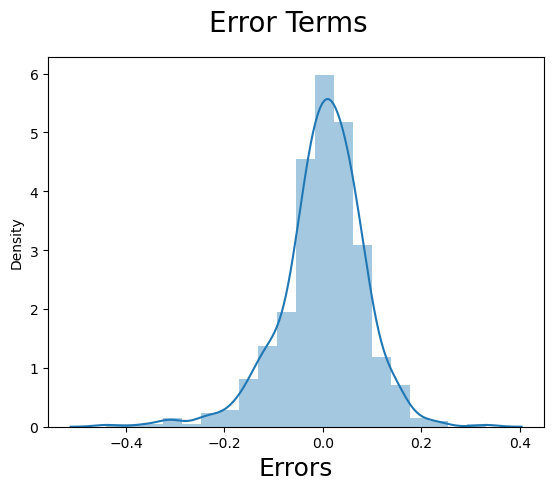

In [48]:
X_train = sm.add_constant(X_train)
y_train_predict_cnt = lm.predict(X_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)      


## 6. Fine-Tuning is done after model evaluation to optimize the model's hyperparameters for better performance.


## 7. Finally, Model Deployment is the last step once the model is deemed satisfactory.

In [49]:
num_vars= ['temp', 'hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

# devide X(independent - variables) and Y (dependent - predict value)

In [50]:
y_test = df_test.pop('cnt')
X_test = df_test
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
#X_test = X_test[X_train.columns]
# Adding a constant variable
X_test = sm.add_constant(X_test)
X_test.shape
# Making predictions
#y_test_predict_cnt = lm.predict(X_test)

(183, 29)

In [51]:
X_test.head()

,const,holiday,workingday,temp,hum,windspeed,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
184,1.0,1,0,0.831783,0.657364,0.084219,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
535,1.0,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
X_test.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
       'Mist_Cloudy_Broken_clouds_Few_clouds', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', '2019', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter'],
      dtype='object')

In [53]:
y_test_predict_cnt = lm.predict(X_test)
predicted_df = pd.DataFrame({'predict_y': y_test_predict_cnt})


In [54]:
predicted_df.columns


Index(['predict_y'], dtype='object')

In [55]:
predicted_df = pd.concat([predicted_df, y_test], axis=1)

In [56]:
predicted_df.head()

,predict_y,cnt
184,0.378498,0.692706
535,0.899523,0.712034
299,0.435589,0.303382
221,0.617430,0.547400
152,0.603997,0.569029


<Axes: xlabel='predict_y', ylabel='cnt'>

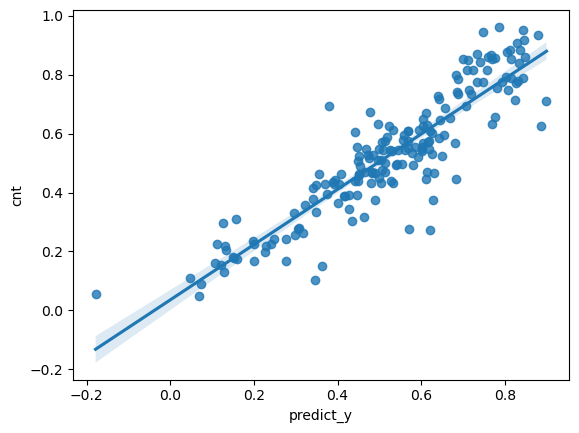

In [57]:

sns.regplot(x='predict_y',y='cnt', data=predicted_df)

In [58]:
X_test.head()

,const,holiday,workingday,temp,hum,windspeed,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds,mon,sat,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
184,1.0,1,0,0.831783,0.657364,0.084219,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
535,1.0,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [59]:
#Trying to run the model to look at base-line
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#X_test = sm.add_constant(data=X_test)
#print(X_train.info)
lm = sm.OLS(y_test,X_test).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     34.49
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.98e-52
Time:                        03:40:11   Log-Likelihood:                 199.62
No. Observations:                 183   AIC:                            -343.2
Df Residuals:                     155   BIC:                            -253.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

# Fine Tune

In [60]:
#now Lets check the VIF on test set...Just checking to explore
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_test = X_test.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,workingday,106.08
9,sun,17.70
8,sat,16.98
25,spring,10.12
26,summer,7.90
2,temp,7.74
18,jul,7.68
27,winter,7.51
22,nov,7.03
16,feb,6.94


In [61]:
#now Lets check the VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = X_train.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,workingday,86.61
9,sun,19.73
8,sat,19.71
25,spring,10.99
27,winter,9.11
26,summer,8.24
2,temp,6.92
23,oct,6.58
22,nov,6.51
14,aug,6.24


### test Dropping VIF > 5 columns 
- workingday	86.61
- sun	19.73



In [62]:
def drop_col_and_run_VIF(test_array, X_train):
    for col in test_array:
        X_train = X_train.drop([col], axis=1)
        X_train = sm.add_constant(data=X_train)
        lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
        print(lm.summary())
        #verify R2 above
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        X_train = X_train.drop(['const'], axis=1)
        vif = pd.DataFrame()
        X = X_train
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)
        print('==========================')
    return X_train
    

In [63]:
# X_train = drop_col_and_run_VIF(['workingday','Mist_Cloudy_Broken_clouds_Few_clouds'],X_train)


In [64]:
# X_train.head()

In [65]:
# X_train = drop_col_and_run_VIF(['temp','hum'],X_train)

In [66]:
# X_train.head()

In [67]:
# X_train = drop_col_and_run_VIF(['spring','winter'],X_train)

## Try Running RFE on the DataSet to pick features automatically...

In [68]:
# Running RFE with the output number of the variable equal to 10
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
  True,
  1),
 ('Mist_Cloudy_Broken_clouds_Few_clouds', False, 5),
 ('mon', False, 11),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 16),
 ('tue', False, 12),
 ('wed', False, 17),
 ('2019', True, 1),
 ('aug', False, 14),
 ('dec', False, 8),
 ('feb', False, 10),
 ('jan', False, 9),
 ('jul', False, 2),
 ('jun', False, 15),
 ('mar', False, 19),
 ('may', False, 13),
 ('nov', False, 7),
 ('oct', False, 18),
 ('sep', False, 4),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 3)]

In [69]:

col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
       'sat', 'sun', '2019', 'spring'],
      dtype='object')

In [70]:

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(data=X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     262.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.94e-190
Time:                        03:43:39   Log-Likelihood:                 501.24
No. Observations:                 547   AIC:                            -982.5
Df Residuals:                     537   BIC:                            -939.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------